# 0. Drahtlose Kommunikation

## 0.1 Bildquellen und Vorlesungsinhalte
Die in diesem Dokument verwendeten Bilder, sofern sich nicht mit dem hier aufgeführten Code generiert wurden, stammen aus dem PC-Übungsskript "Drahtlose Kommunikation - MATLAB Rechenübung" von Dipl. -ing Lutz Molle und Prof. Dr. -ing. Markus Nölle an der HTW Berlin. Sie wurden teilsweise zur besseren Darstellung von mir verändert.


# 1. Simulation des Übertragungssystems

Die Funktionen werden immer paarweise implementiert, da sie ähnlich wie beim OSI Modell komplementäre Funktionen ausüben.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from typing import List, Set, Dict, Tuple, Any

In [2]:
%load_ext lab_black
IPython.display.set_matplotlib_formats("pdf", "svg")

## 1.1 Quelle und Senke
![Quelle und Senke](Images/01_Quell_Senke.png)

In [3]:
def generate_bits(n_bits: int) -> List[bool]:
    """
    Generate a vector with the shape 1 * n_bits from random values between
    True and False.
    """

    if type(n_bits) != int:
        raise TypeError("Expected n_bits to be of type int.")
    choices: Set[bool] = {True, False}
    vector_shape: Tuple[int, int] = (1, n_bits)
    bit_vector: List[bool] = np.random.choice(a=choices, size=vector_shape)
    return bit_vector

In [4]:
def count_errors(x: List[bool], bits: List[bool]) -> Tuple[int, float]:
    """
    Get two bit vectors an compere them.
    Returns count of different bits an bit-error-racio.
    The lenth of both vectors should be equal.
    Both input vectors must be of type bool.
    """

    len_x: int = len(x)
    if len_x != len(bits):
        raise ValueError("Lengths of bit vectores are different.")
    for item in x:
        if type(item) != bool:
            raise TypeError("Expected x to be of type bool.")
    for item in bits:
        if type(item) != bool:
            raise TypeError("Expected bits to be of type bool.")
    equal_bits: int = np.array(x) & np.array(bits)
    n_error: int = len_x - np.count_nonzero(equal_bits)
    bit_error_rate: float = float(n_error) / float(len_x)
    return (n_error, bit_error_rate)

# 1.1 Kanal codierung
![Kanal codierung](Images/02_Kanal_Codierung.png)

# 1.2 Mapper, Demapper, Entscheider
![Mapper, Demapper, Entscheider](Images/03_Mapper.png)

In [5]:
def mapper(bits: List[bool], constellation: List[complex]) -> complex:
    """
    Get list of bits and encode them to a symbol.
    """
    len_bits: int = len(bits)
    len_constellation: int = len(constellation)
    if 2 ** len_bits != len_constellation:
        raise ValueError(
            f"Constellation vector length ({len_constellation}) "
            + f"doesn't match bit vector length ({len_bits}). "
            + "Constellation must be two to the power of bit vector."
        )
    bit_string: str = ""
    for bit in bits:
        if bit == False:
            bit_string = bit_string + "0"
        else:
            bit_string = bit_string + "1"
    symbol: int = int(bit_string, 2)
    return constellation[symbol]

In [6]:
# TODO: demapper(symbols: List[complex], constellation: List[complex]): -> List[bool]
def demapper(symbol: complex, constellation: List[complex]) -> List[bool]:
    """
    Get symbol and retunrns corresponding bit sequence.
    """
    len_constellation: int = len(constellation)
    len_bits: numpy.float64 = int(
        np.log(len_constellation) / np.log(2)
    )  # Bit const_len should be 2**bit_len
    if len_bits % 1 != 0:
        raise ValueError(
            "Expected constellation vector's length to be a power of two, "
            + "got len {len_constellation} instead"
        )
    bits_integer = constellation.index(symbol)
    # bit vector lenth depends on constellation lenth
    # bit vector value depends on position in constellation vector
    bits_string = ("{0:0" + f"{len_bits}" + "b}").format(bits_integer)
    bits = [
        bool(int(bit)) for bit in bits_string
    ]  # int cast because "0"-String is True
    return bits

In [7]:
def decission(symbols: List[complex], constellation: List[complex]) -> List[bool]:
    """
    Get list of symbols. Return list of symboles where eukledian
    distance to the origianl Symbol.

    symbols: List of noisy input symbols.
    constallation: List of constallation symbols.
    """

    decission: List[complex] = []
    for symbol in symbols:
        distance: List[complex] = []
        for const_symbol in constellation:
            distance.append(np.linalg.norm(const_symbol - symbol))
        const_index = distance.index(min(distance))
        decission.append(constellation[const_index])
    return decission

# 1.3 Kanal (Funk, Kabel, ...)
![Kanal (Funk, Kabel, ...](Images/04_Kanal.png)

In [8]:
def awgn():
    pass

In [9]:
def radio_fading_channel():
    pass

# 2. Demonstration der einzelnen Funktionen
## 2.1 Quelle und Senke
### 2.1.1 Quelle

In [10]:
pass

### 2.1.2 Senke

In [11]:
pass

## 2.2 Mapper, Demapper, Entscheider
### 2.2.1 Mapper

In [12]:
def plot_mapper(bits: List[bool]) -> None:
    ORIGIN = (0, 0)

    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=[4, 4])
    fig.suptitle(f"Symbol aus dem mapper für {bits}.")

    constellation: List[complex] = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
    mapper_result: complex = mapper(bits, constellation)

    ax = fig.add_subplot(axs)
    ax.grid(True)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginär")

    ax.arrow(
        *ORIGIN,
        mapper_result.real,
        mapper_result.imag,
        length_includes_head=True,
        head_width=0.075,
        head_length=0.1,
        fc="black",
        ec="black",
    )
    # plt.arro1(0, 0, 1, 1, color=["r"], scale=21)
    plt.show()

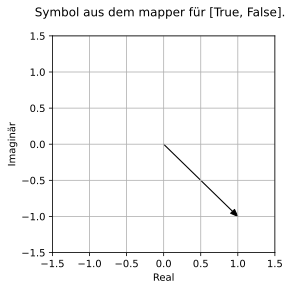

In [13]:
plot_mapper([True, False])

### 2.2.2 Entscheider

In [14]:
constellation: List[complex] = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
noisy_symbols: List[complex] = [1.1 + 0.9j, -1.2 - 1.3j, -1 + 0.9j]
print(f"Noisy symbols:   {noisy_symbols}")
print(f"Decided symbols: {decission(noisy_symbols, constellation)}")

Noisy symbols:   [(1.1+0.9j), (-1.2-1.3j), (-1+0.9j)]
Decided symbols: [(1+1j), (-1-1j), (-1+1j)]


### 2.2.3 Demapper

In [15]:
constellation: List[complex] = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
symbols: List[complex] = [-1 + 1j, -1 - 1j, -1 + 1j]
demapper(symbols[0], constellation)

[False, True]

# 3. Komplette Simulation